What is Customer Churn?
Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service.

Customers in the telecom industry can choose from a variety of service providers and actively switch from one to the next. The telecommunications business has an annual churn rate of 15-25 percent in this highly competitive market.

Individualized customer retention is tough because most firms have a large number of customers and can't afford to devote much time to each of them. The costs would be too great, outweighing the additional revenue. However, if a corporation could forecast which customers are likely to leave ahead of time, it could focus customer retention efforts only on these "high risk" clients. The ultimate goal is to expand its coverage area and retrieve more customers loyalty. The core to succeed in this market lies in the customer itself.

Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new customers.


To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.


Objectives
I will explore the data and try to answer some questions like:

What's the % of Churn Customers and customers that keep in with the active services?
Is there any patterns in Churn Customers based on the gender?
Is there any patterns/preference in Churn Customers based on the type of service provided?
What's the most profitable service types?
Which features and services are most profitable?
Many more questions that will arise during the analysis

In [1]:
#Data Loading


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('datasets\churn_prediction.csv')

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\pcc\AppData\Local\Temp\ipykernel_26832\3469916711.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv('datasets\churn_prediction.csv')


In [4]:
#Data Cleaning

In [5]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [6]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [7]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object

In [8]:
df['churn'] = df['churn'].astype('category')
df['branch_code'] = df['branch_code'].astype('category')
df['dependents'] = df['dependents'].astype('Int64')
df['city'] = df['city'].astype('category')
df['gender'] = df['gender'].astype('category')
df['occupation'] = df['occupation'].astype('category')
df['last_transaction'] = pd.to_datetime(df['last_transaction'])

In [9]:
df.dtypes

customer_id                                int64
vintage                                    int64
age                                        int64
gender                                  category
dependents                                 Int64
occupation                              category
city                                    category
customer_nw_category                       int64
branch_code                             category
current_balance                          float64
previous_month_end_balance               float64
average_monthly_balance_prevQ            float64
average_monthly_balance_prevQ2           float64
current_month_credit                     float64
previous_month_credit                    float64
current_month_debit                      float64
previous_month_debit                     float64
current_month_balance                    float64
previous_month_balance                   float64
churn                                   category
last_transaction    

In [10]:
df.dropna(subset=['city'], inplace=True)

In [11]:
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['dependents'].fillna(df['dependents'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)

C:\Users\pcc\AppData\Local\Temp\ipykernel_26832\3361685692.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].fillna(df['gender'].mode()[0], inplace=True)
C:\Users\pcc\AppData\Local\Temp\ipykernel_26832\3361685692.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [12]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,Male,0,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01


In [13]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [14]:
df.describe()

,customer_id,vintage,age,dependents,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,last_transaction
count,27579.000000,27579.000000,27579.000000,27579.0,27579.000000,2.757900e+04,2.757900e+04,2.757900e+04,2.757900e+04,2.757900e+04,2.757900e+04,2.757900e+04,2.757900e+04,2.757900e+04,2.757900e+04,24474
mean,15144.561405,2090.670837,48.230211,0.317814,2.221872,7.430424e+03,7.543104e+03,7.540599e+03,7.156009e+03,3.478707e+03,3.303087e+03,3.681957e+03,3.363422e+03,7.499820e+03,7.537727e+03,2019-10-22 04:33:18.136797952
min,1.000000,73.000000,1.000000,0.0,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,2018-12-31 00:00:00
25%,7559.500000,1958.000000,36.000000,0.0,2.000000,1.782160e+03,1.903410e+03,2.179565e+03,1.830145e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.995030e+03,2.072690e+03,2019-09-27 00:00:00
50%,15155.000000,2153.000000,46.000000,0.0,2.000000,3.275190e+03,3.376580e+03,3.538140e+03,3.353450e+03,6.300000e-01,6.400000e-01,9.254000e+01,1.124800e+02,3.441770e+03,3.459420e+03,2019-12-01 00:00:00
75%,22700.500000,2292.000000,60.000000,0.0,3.000000,6.659195e+03,6.676510e+03,6.680845e+03,6.525275e+03,7.143050e+02,7.573050e+02,1.379850e+03,1.360140e+03,6.698260e+03,6.667065e+03,2019-12-20 00:00:00
max,30301.000000,2476.000000,90.000000,52.0,3.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,2019-12-31 00:00:00
std,8742.212396,273.304991,17.837602,0.962442,0.661931,4.315654e+04,4.308592e+04,4.227262e+04,4.515913e+04,7.816688e+04,3.006704e+04,5.267872e+04,2.453077e+04,4.258485e+04,4.298844e+04,NaN


In [15]:
# Remove Outliers

In [16]:
numeric_cols = df.select_dtypes(include=['number']).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
df1 = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
df1

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
3,5,2329,90,Male,0,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
6,8,2048,72,Male,0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
8,10,2053,31,Male,0,salaried,1096.0,2,4110,1355.86,...,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
10,12,2389,68,Male,0,retired,409.0,3,709,1928.76,...,1722.60,747.66,443.40,0.54,0.54,208.79,1606.54,1800.15,0,2019-12-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28374,30294,2417,55,Male,0,salaried,1076.0,3,463,7713.88,...,7713.88,7670.06,0.33,0.33,0.33,0.33,7713.88,7713.88,1,2019-02-28
28375,30295,2398,42,Male,0,self_employed,146.0,2,286,7493.69,...,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0,2019-11-04
28376,30296,2300,85,Male,0,retired,1589.0,2,389,1741.50,...,1741.50,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0,NaT
28377,30297,2325,10,Female,0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22


In [17]:
len(df1), len(df)

(14119, 27579)

In [18]:
df1.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                  2462
dtype: int64

In [19]:
df1.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
3,5,2329,90,Male,0,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
6,8,2048,72,Male,0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
8,10,2053,31,Male,0,salaried,1096.0,2,4110,1355.86,...,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
10,12,2389,68,Male,0,retired,409.0,3,709,1928.76,...,1722.60,747.66,443.40,0.54,0.54,208.79,1606.54,1800.15,0,2019-12-26


In [20]:
df1.reset_index(drop=True, inplace=True)

In [21]:
df1

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,5,2329,90,Male,0,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
2,8,2048,72,Male,0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24
3,10,2053,31,Male,0,salaried,1096.0,2,4110,1355.86,...,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0,2019-12-12
4,12,2389,68,Male,0,retired,409.0,3,709,1928.76,...,1722.60,747.66,443.40,0.54,0.54,208.79,1606.54,1800.15,0,2019-12-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14114,30294,2417,55,Male,0,salaried,1076.0,3,463,7713.88,...,7713.88,7670.06,0.33,0.33,0.33,0.33,7713.88,7713.88,1,2019-02-28
14115,30295,2398,42,Male,0,self_employed,146.0,2,286,7493.69,...,8082.48,3515.03,0.51,90.10,1103.20,1183.04,7956.03,7431.36,0,2019-11-04
14116,30296,2300,85,Male,0,retired,1589.0,2,389,1741.50,...,1741.50,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0,NaT
14117,30297,2325,10,Female,0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22


In [22]:
# Feature Transformation

In [23]:
df1['Day'] = df['last_transaction'].dt.day
df1['Month'] = df['last_transaction'].dt.month
df1['Year'] = df['last_transaction'].dt.year

C:\Users\pcc\AppData\Local\Temp\ipykernel_26832\14221931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Day'] = df['last_transaction'].dt.day
C:\Users\pcc\AppData\Local\Temp\ipykernel_26832\14221931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Month'] = df['last_transaction'].dt.month
C:\Users\pcc\AppData\Local\Temp\ipykernel_26832\14221931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [24]:
df1 = df1.drop(['customer_id', 'last_transaction'], axis=1) # Use drop to remove columns by name

In [25]:
df1.dtypes

vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category                 int64
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
Day                                float64
Month                              float64
Year                               float64
dtype: object

In [26]:
df1 = df1.drop(['Day', 'Month', 'Year'], axis=1)

In [27]:
X = df1.drop('churn', axis=1)
y = df1['churn']

In [28]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,vintage,age,dependents,customer_nw_category,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,...,branch_code_4702,branch_code_4705,branch_code_4711,branch_code_4715,branch_code_4720,branch_code_4724,branch_code_4737,branch_code_4753,branch_code_4764,branch_code_4782
0,2101,66,0,2,1458.71,1458.71,1458.71,1449.07,0.20,0.20,...,False,False,False,False,False,False,False,False,False,False
1,2329,90,0,2,2291.91,2291.91,2084.54,1006.54,0.47,0.47,...,False,False,False,False,False,False,False,False,False,False
2,2048,72,0,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,...,False,False,False,False,False,False,False,False,False,False
3,2053,31,0,2,1355.86,1355.86,1702.44,1126.13,714.51,121.09,...,False,False,False,False,False,False,False,False,False,False
4,2389,68,0,3,1928.76,1571.47,1722.60,747.66,443.40,0.54,...,False,False,False,False,False,False,False,False,False,False


In [29]:
#Standard Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(X)

In [31]:
#Splitting Dataset

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.35, random_state=1)

In [34]:
#Model Building

In [35]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(class_weight = 'balanced')
LR.fit(X_train, y_train)

c:\Users\pcc\Desktop\Python Projects\Exploratory data analysis\eda_env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [36]:
y_pred = LR.predict(X_test)
y_prob = LR.predict_proba(X_test)

In [37]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [38]:
y_prob

array([[9.99803769e-01, 1.96231417e-04],
       [9.97642952e-01, 2.35704780e-03],
       [2.17894032e-02, 9.78210597e-01],
       ...,
       [7.76734798e-01, 2.23265202e-01],
       [9.99826854e-01, 1.73145589e-04],
       [9.59003860e-01, 4.09961399e-02]])

In [39]:
from sklearn.metrics import classification_report

In [40]:
repo = classification_report(y_test, y_pred)
print(repo)

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      4375
           1       0.21      0.39      0.27       567

    accuracy                           0.77      4942
   macro avg       0.56      0.60      0.57      4942
weighted avg       0.83      0.77      0.79      4942



In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

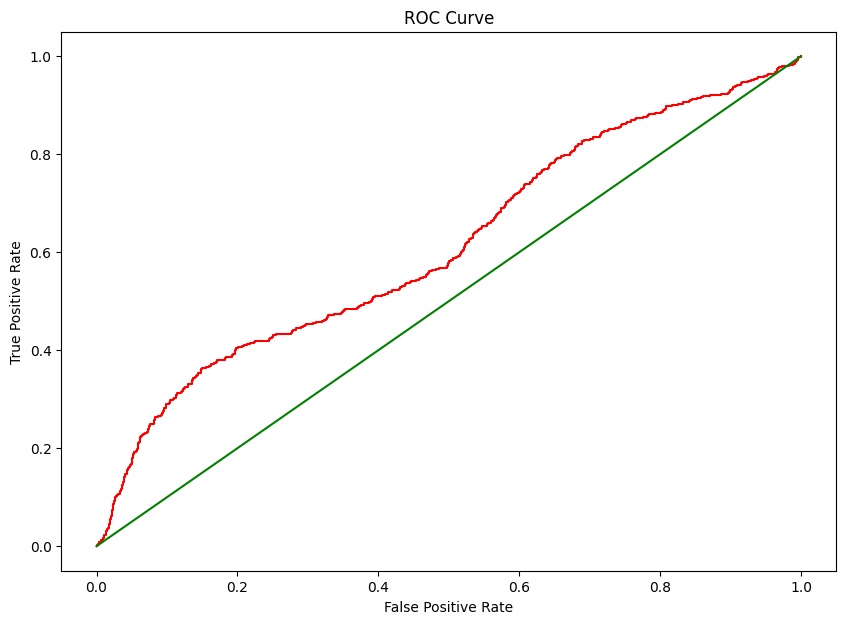

np.float64(0.6126218190980096)

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(fpr, tpr, color = 'red')
plt.plot([0,1], [0,1], color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
roc_auc_score(y_test, y_prob[:,1])